# <p style="text-align: center;"> Term 4 & Term 5 - Machine Learning Intermediate & Advanced </p> </br> <p style="text-align: center;"> Term Project - Election Data Set </p> 
Submitted By - Gaurav Virmani <br/>
Batch - March 2020 <br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
   - 1.1 [Introduction](#section101)<br/>
   - 1.2 [Data Source and Data Set](#section102)<br/>
   <br/>
2. [Install / Manage Additional Libraries](#section2)<br>
   <br/>
3. [Import Packages](#section3)<br>
   <br/>
4. [Load & Read Dataset](#section4)<br>
   - 4.1 [Dataset Description](#section401)<br/>
   <br/>
5. [Data Processing](#section5)<br>
<br/>
6. [Exploratory Data Analysis (EDA)](#section6)<br>
<br/>
7. [Predictive Modeling](#section7)<br>
   - 7.1 [Data Preparation for Modeling](#section701)<br/>
   - 7.2 [Logistic Regression](#section702)<br/>
   - 7.3 [KNN Model](#section703)<br/>
   - 7.4 [Naïve Bayes](#section704)<br/>
   - 7.5 [Support Vector Machine](#section705)<br/>
<br/>
8. [Conclusion : All Models Comparison](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

One of the leading news channels wants to analyze recent elections. The survey was conducted on 1525 voters with 9 variables. There is a need to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

<a id=section101></a> 
### 1.1. Introduction

Here, **Exploratory Data Analysis (EDA) and Machine Learning** concepts, along with **Python** are used on **Election** data set to identify hidden relationships & attributes, build models using variables, draw conclusions and choose the best predictive model from the data. 
<br/>  

<a id=section102></a> 
### 1.2. Data Source and Dataset

__Set__: "Election_Data.xlsx"

<a id=section2></a>
## 2. Install / Manage Additional Libraries

In [455]:
!pip install chart-studio
!pip install joblib
!pip install -q datascience 
!pip install -q pandas-profiling

Error processing line 7 of C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


Error processing line 7 of C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\virmanig\AppData\Local\Continuum\anaconda3\lib\si

<a id=section3></a>
## 3. Import Packages

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This is to ignore the warnings
import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

<a id=section4></a>
## 4. Load & Read Data Set

In [457]:
xls = pd.ExcelFile('C:/Users/virmanig/PythonCodes/Term 4 - ML Intermediate/Project/Election_Data.xlsx')
data = pd.read_excel(xls, 'Election_Dataset')

<a id=section401></a>
### 4.1. Dataset Description

**Columns Details:**

| Column Name               | Description                                                                                     |
| :-----------              | :-----------                                                                                    |
| vote                      | Party choice: Conservative or Labour                                                            |
| age                       | Age (in years)                                                                                  |
| economic.cond.national    | Assessment of current national economic conditions (1 to 5)                                     |
| economic.cond.household   | Assessment of current household economic conditions ( 1 to 5)                                   |
| Blair                     | Assessment of the Labour leader (1 to 5)                                                        |
| Hague                     | Assessment of the Conservative leader (1 to 5)                                                  |
| Europe                    | 11-point scale that measures respondents attitude towards European integration. High scores represent ‘Eurosceptic’ sentiment                                                                                             |
| political.knowledge       | Knowledge of parties positions on European integration (0 to 3)                                 |
| gender                    | female or male                                                                                  |

**Vote** is the Target Variable.

In [458]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [459]:
data=data.drop('Unnamed: 0',axis=1)

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


- There are a total of **1525 samples (rows)** and **9 columns** in the dataset

- **7 columns** with a **numeric** datatype and **2 columns** with an **object** datatype
  
- There are **0 missing** values in the data

In [461]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [462]:
data.shape

(1525, 9)

In [463]:
data.describe(include="all")

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [464]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=section5></a>
## 5. Data Processing

In [465]:
data.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [466]:
data.duplicated().value_counts()

False    1517
True        8
dtype: int64

In [467]:
data.drop_duplicates(inplace=True)

In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [469]:
data.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [470]:
data.shape

(1517, 9)

In [471]:
print(data['vote'].value_counts(ascending=True))
print(data['age'].value_counts(ascending=True))
print(data['economic.cond.national'].value_counts(ascending=True))
print(data['economic.cond.household'].value_counts(ascending=True))
print(data['Blair'].value_counts(ascending=True))
print(data['Hague'].value_counts(ascending=True))
print(data['Europe'].value_counts(ascending=True))
print(data['political.knowledge'].value_counts(ascending=True))
print(data['gender'].value_counts(ascending=True))

Conservative     460
Labour          1057
Name: vote, dtype: int64
93     1
90     1
91     1
92     2
87     3
      ..
46    37
35    38
47    38
49    39
37    42
Name: age, Length: 70, dtype: int64
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64
2      77
7      86
10    101
1     109
8     111
9     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64
male      709
female    808
Name: gender, dtype: int64


<a id=section6></a>
## 6. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a method to analyze and visualize data using different types of plots.

Text(0.5, 1.0, 'Box Plot (Outliers)')

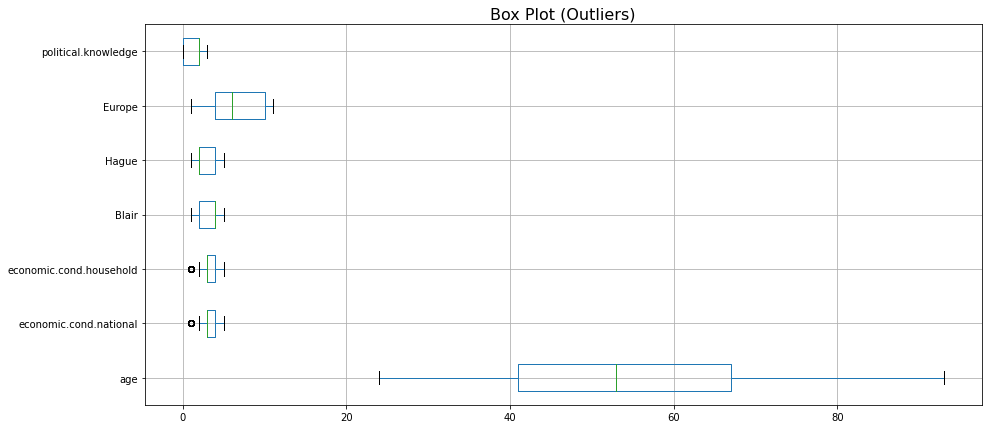

In [472]:
plt.figure(figsize=(15,7))
data.boxplot(vert=0)
plt.title('Box Plot (Outliers)',fontsize=16)

As this is nominal data, outliers that are very less can be ingnored.

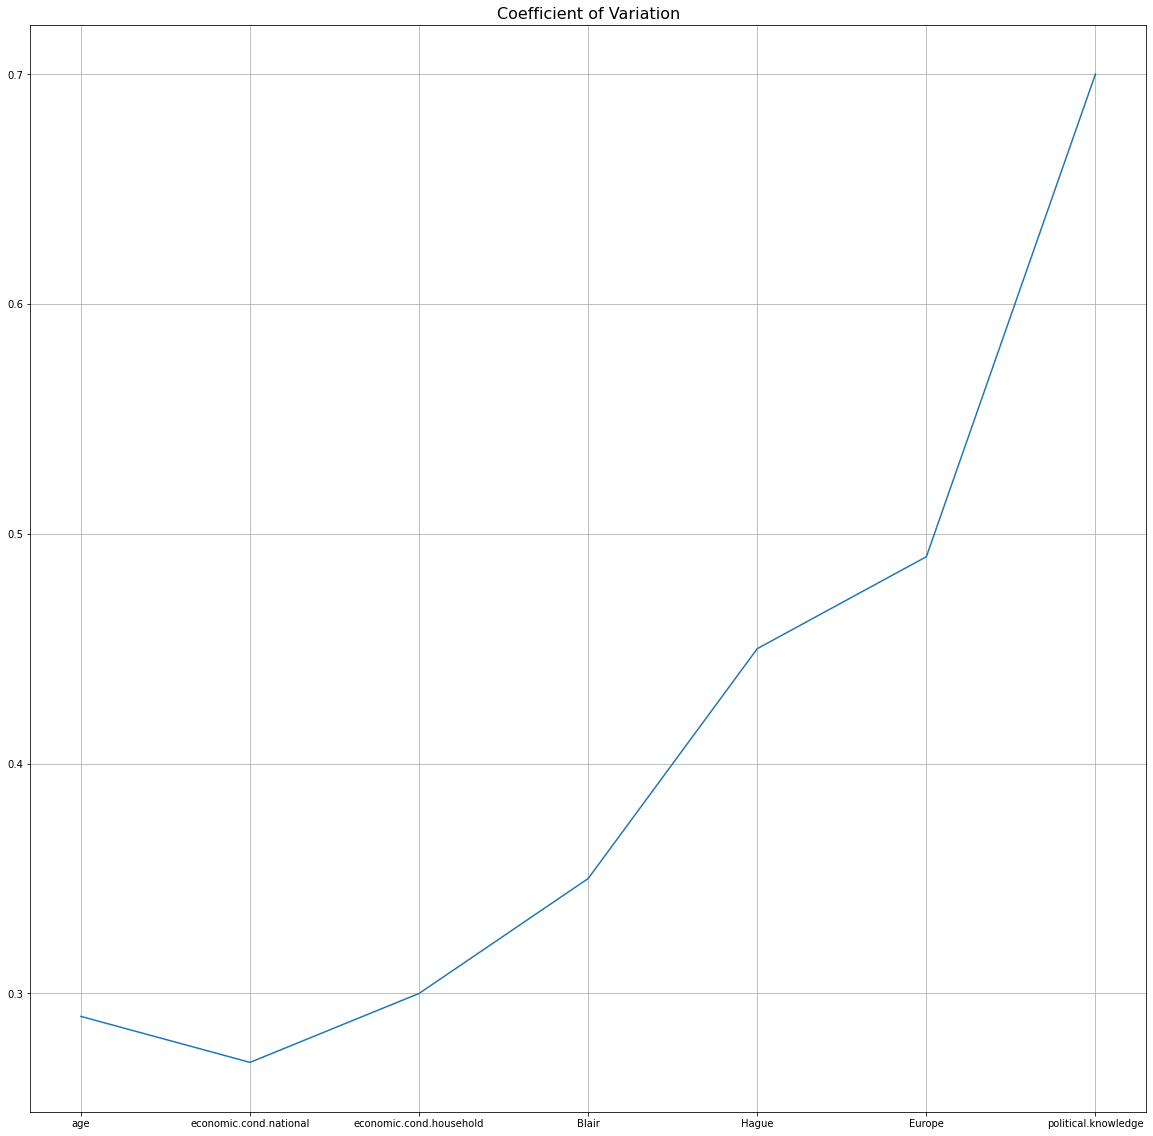

In [473]:
cv=round(data.std()/data.mean(),2)
cv.plot(figsize=(20,20),title="Coefficient of Variation",grid=True)
plt.title('Coefficient of Variation',fontsize=16);
#CV>1 , huge variability

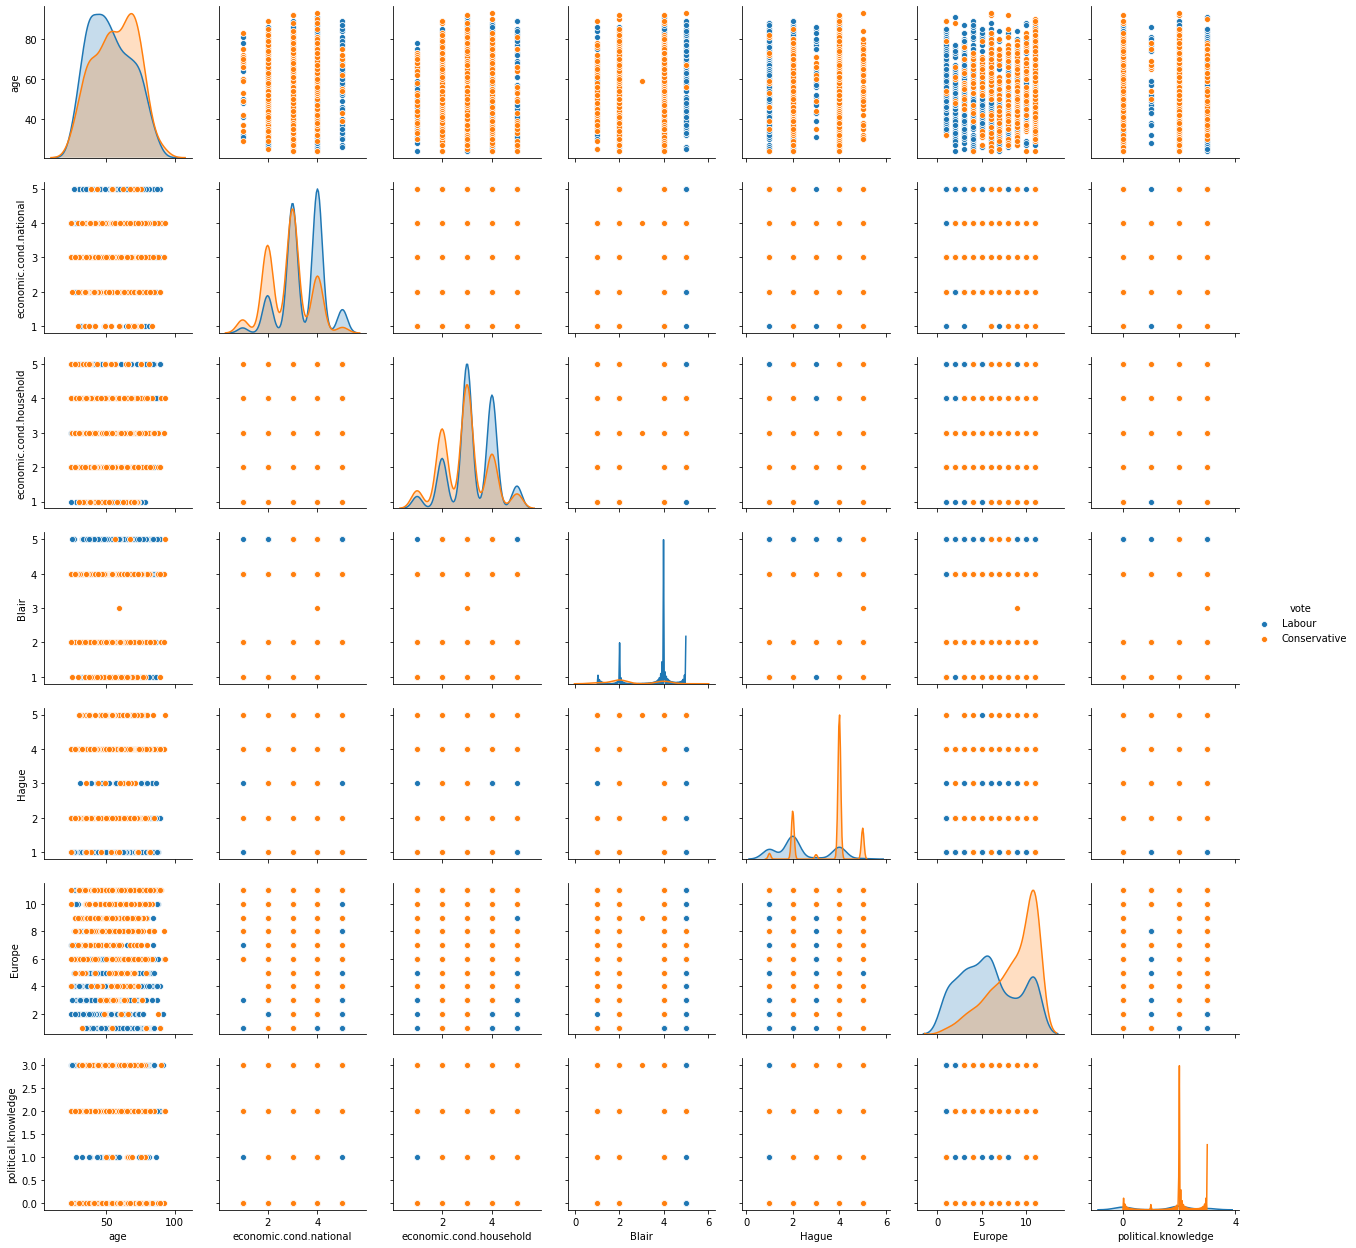

In [474]:
sns.pairplot(data,hue='vote');

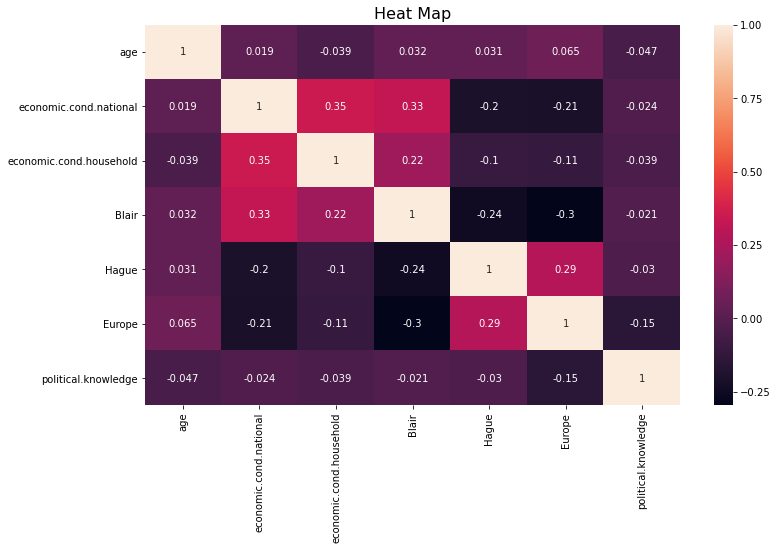

In [475]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Heat Map',fontsize=16);

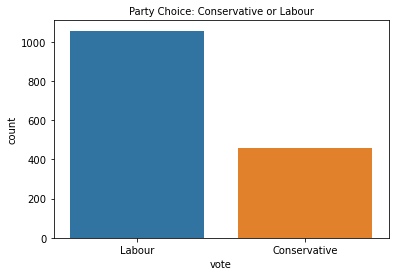

In [476]:
sns.countplot(data=data,x='vote')
plt.title('Party Choice: Conservative or Labour',fontsize=10);

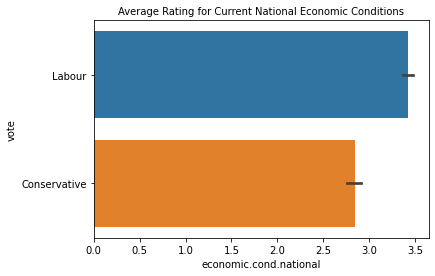

In [477]:
sns.barplot(data=data,x='economic.cond.national',y='vote')
plt.title('Average Rating for Current National Economic Conditions',fontsize=10);

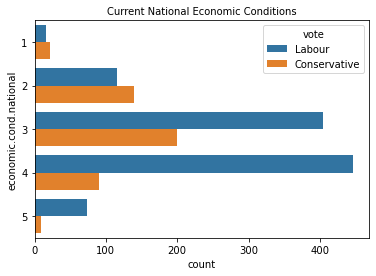

In [478]:
sns.countplot(data=data,y='economic.cond.national',hue='vote')
plt.title('Current National Economic Conditions',fontsize=10);

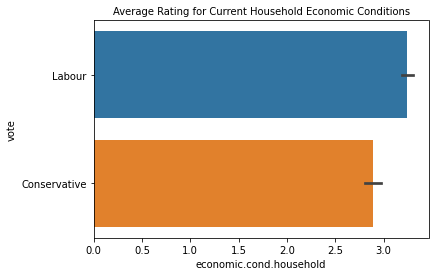

In [479]:
sns.barplot(data=data,x='economic.cond.household',y='vote')
plt.title('Average Rating for Current Household Economic Conditions',fontsize=10);

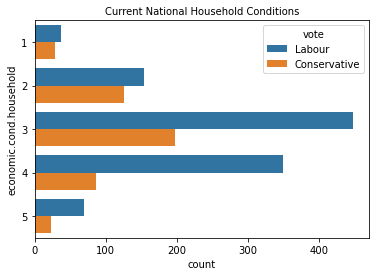

In [480]:
sns.countplot(data=data,y='economic.cond.household',hue='vote')
plt.title('Current National Household Conditions',fontsize=10);

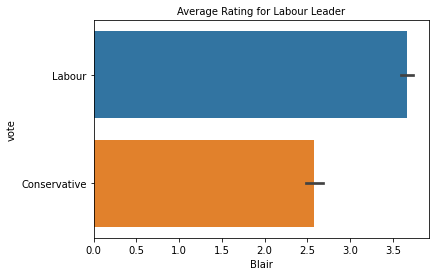

In [481]:
sns.barplot(data=data,x='Blair',y='vote')
plt.title('Average Rating for Labour Leader',fontsize=10);

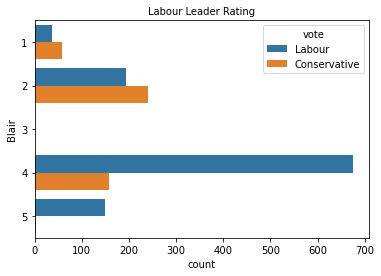

In [482]:
sns.countplot(data=data,y='Blair',hue='vote')
plt.title('Labour Leader Rating',fontsize=10);

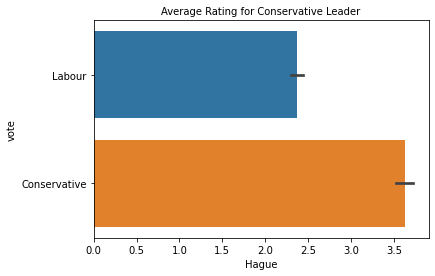

In [483]:
sns.barplot(data=data,x='Hague',y='vote')
plt.title('Average Rating for Conservative Leader',fontsize=10);

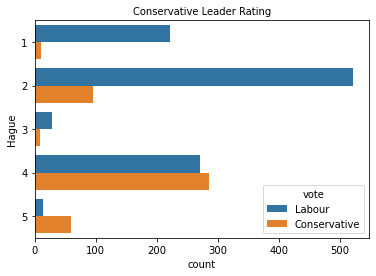

In [484]:
sns.countplot(data=data,y='Hague',hue='vote')
plt.title('Conservative Leader Rating',fontsize=10);

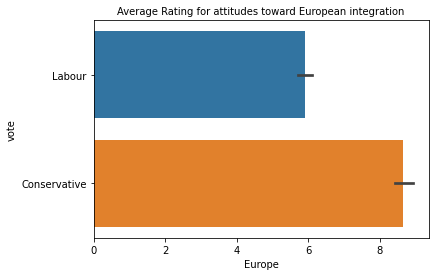

In [485]:
sns.barplot(data=data,x='Europe',y='vote')
plt.title('Average Rating for attitudes toward European integration',fontsize=10);

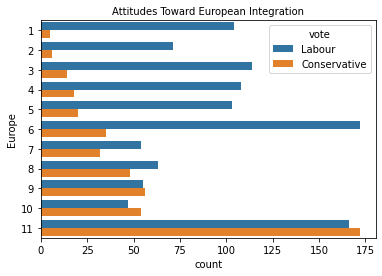

In [486]:
sns.countplot(data=data,y='Europe',hue='vote')
plt.title('Attitudes Toward European Integration',fontsize=10);

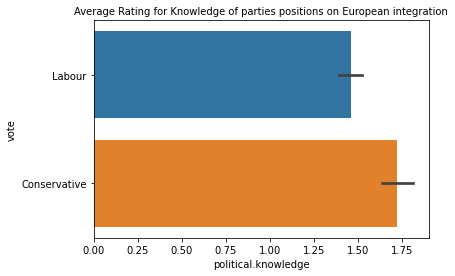

In [487]:
sns.barplot(data=data,x='political.knowledge',y='vote')
plt.title('Average Rating for Knowledge of parties positions on European integration',fontsize=10);

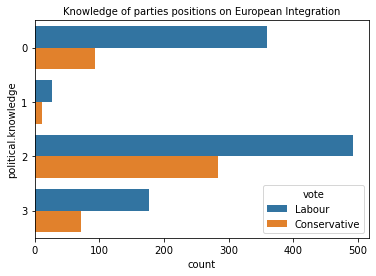

In [488]:
sns.countplot(data=data,y='political.knowledge',hue='vote')
plt.title('Knowledge of parties positions on European Integration',fontsize=10);

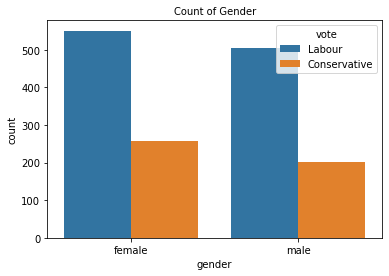

In [489]:
sns.countplot(data=data,x='gender',hue='vote')
plt.title('Count of Gender',fontsize=10);

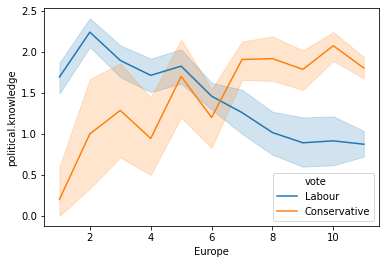

In [490]:
sns.lineplot(x='Europe',y='political.knowledge', data=data,hue='vote');

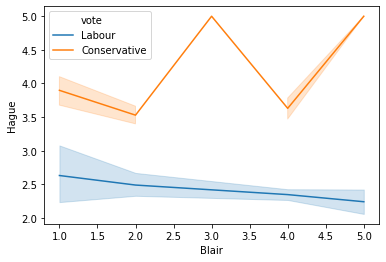

In [491]:
sns.lineplot(x='Blair',y='Hague', data=data,hue='vote');

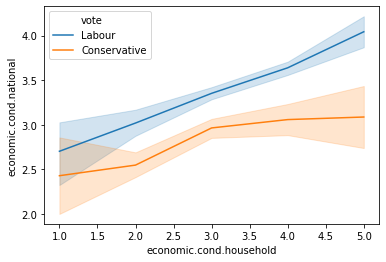

In [492]:
sns.lineplot(x='economic.cond.household',y='economic.cond.national', data=data,hue='vote');

In [493]:
data.groupby("vote").mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
vote,,,,,,,
Conservative,56.841304,2.841304,2.891304,2.576087,3.623913,8.663043,1.723913
Labour,53.109745,3.421003,3.245033,3.666036,2.368969,5.903500,1.460738


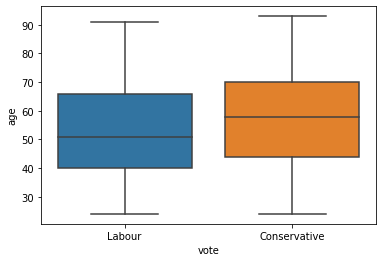

In [494]:
sns.boxplot(x='vote', y='age', data=data );

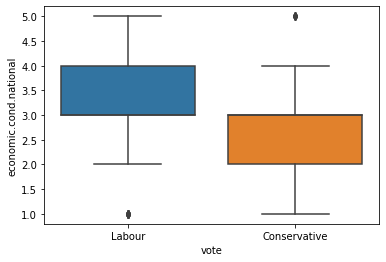

In [495]:
sns.boxplot(x='vote', y='economic.cond.national', data=data );

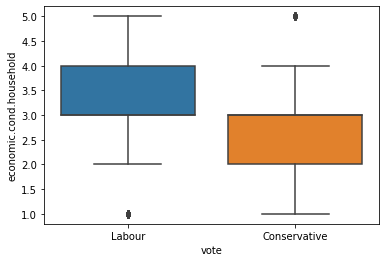

In [496]:
sns.boxplot(x='vote', y='economic.cond.household', data=data );

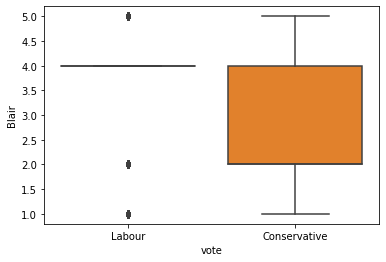

In [497]:
sns.boxplot(x='vote', y='Blair', data=data );

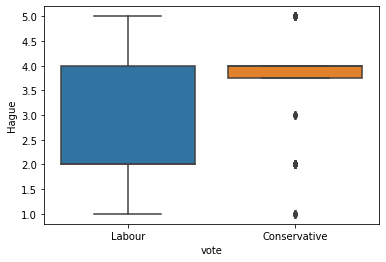

In [498]:
sns.boxplot(x='vote', y='Hague', data=data );

In [499]:
bins = [18, 29, 39, 49, 59, 69, 119]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['agerange'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

In [500]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,agerange
0,Labour,43,3,3,4,1,2,2,female,40-49
1,Labour,36,4,4,4,4,5,2,male,30-39
2,Labour,35,4,4,5,2,3,2,male,30-39
3,Labour,24,4,2,2,1,4,0,female,18-29
4,Labour,41,2,2,1,1,6,2,male,40-49


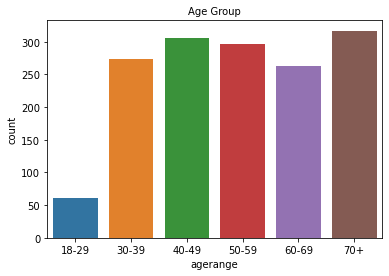

In [501]:
sns.countplot(data=data,x='agerange')
plt.title('Age Group',fontsize=10);

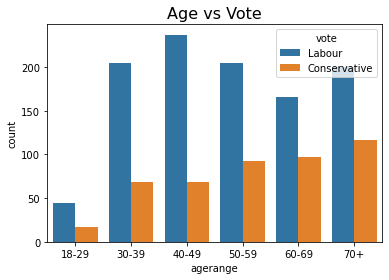

In [502]:
sns.countplot(data=data,x='agerange',hue='vote')
plt.title('Age vs Vote',fontsize=16);

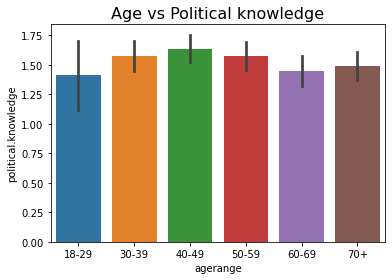

In [503]:
sns.barplot(data=data,x='agerange',y='political.knowledge')
plt.title('Age vs Political knowledge',fontsize=16);

<a id=section7></a>
## 7. Predictive Modeling

<a id=section701></a>
### 7.1. Data Preparation for Modeling 

### Encoding

In [504]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes
        print('\n')

feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]




In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   int8    
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   int8    
 9   agerange                 1517 non-null   category
dtypes: category(1), int64(7), int8(2)
memory usage: 139.5 KB


### Scalling

In [506]:
data = data.drop(['agerange'], axis=1)
std=StandardScaler()
scaled_data=std.fit_transform(data)

In [507]:
scaled_data

array([[ 0.65969231, -0.7161609 , -0.27818529, ..., -1.43733791,
         0.42383219, -0.93673649],
       [ 0.65969231, -1.16211836,  0.85624237, ..., -0.52768351,
         0.42383219,  1.06753608],
       [ 0.65969231, -1.22582657,  0.85624237, ..., -1.13411978,
         0.42383219,  1.06753608],
       ...,
       [ 0.65969231, -1.09841015, -0.27818529, ..., -1.43733791,
         0.42383219,  1.06753608],
       [-1.5158582 ,  0.43058686, -0.27818529, ...,  1.29162531,
         0.42383219,  1.06753608],
       [-1.5158582 ,  1.25879357, -1.41261295, ...,  1.29162531,
        -1.42108441, -0.93673649]])

In [508]:
scaled_data1 = data.copy()
#scaled_data1['vote'] = std.fit_transform(data[['vote']])
scaled_data1['age'] = std.fit_transform(data[['age']])
scaled_data1['economic.cond.national'] = std.fit_transform(data[['economic.cond.national']])
scaled_data1['economic.cond.household'] = std.fit_transform(data[['economic.cond.household']])
scaled_data1['Blair'] = std.fit_transform(data[['Blair']])
scaled_data1['Hague'] = std.fit_transform(data[['Hague']])
scaled_data1['Europe'] = std.fit_transform(data[['Europe']])
scaled_data1['political.knowledge'] = std.fit_transform(data[['political.knowledge']])
scaled_data1['gender'] = std.fit_transform(data[['gender']])

In [509]:
scaled_data1

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,1,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,1,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,1,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536
...,...,...,...,...,...,...,...,...,...
1520,0,0.812836,1.990670,-0.148020,-1.137217,1.014951,1.291625,1.346290,1.067536
1521,0,1.195085,-1.412613,-1.222408,0.565802,1.014951,0.381971,0.423832,1.067536
1522,1,-1.098410,-0.278185,-0.148020,1.417312,1.014951,-1.437338,0.423832,1.067536
1523,0,0.430587,-0.278185,-0.148020,-1.988727,1.014951,1.291625,0.423832,1.067536


### Train-Test Split

In [510]:
X = scaled_data1.drop(['vote'], axis=1)

y = scaled_data1[['vote']]

In [511]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1517 non-null   float64
 1   economic.cond.national   1517 non-null   float64
 2   economic.cond.household  1517 non-null   float64
 3   Blair                    1517 non-null   float64
 4   Hague                    1517 non-null   float64
 5   Europe                   1517 non-null   float64
 6   political.knowledge      1517 non-null   float64
 7   gender                   1517 non-null   float64
dtypes: float64(8)
memory usage: 106.7 KB


In [512]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   vote    1517 non-null   int8 
dtypes: int8(1)
memory usage: 13.3 KB


In [513]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [514]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (1061, 8)
y_train =  (1061, 1)
X_test =  (456, 8)
y_test =  (456, 1)


<a id=section702></a>
### 7.2. Logistic Regression 

In [515]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','liblinear'],
      'tol':[0.001,0.0001,0.00001]}

In [516]:
model = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)

In [517]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [518]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [519]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='sag',
                   tol=0.001)


In [520]:
best_model = grid_search.best_estimator_
lr=best_model
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424081,0.575919
1,0.150115,0.849885
2,0.007467,0.992533
3,0.833272,0.166728
4,0.069747,0.930253


In [521]:
lr.coef_

array([[-0.23295551,  0.55537612,  0.05833088,  0.70431587, -1.01103436,
        -0.69237611, -0.34843737,  0.09815404]])

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



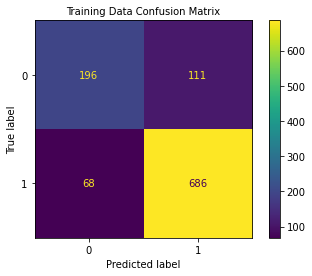

In [522]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');
plt.title('Training Data Confusion Matrix',fontsize=10);

In [523]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
lr_train_acc=lr.score(X_train, y_train)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



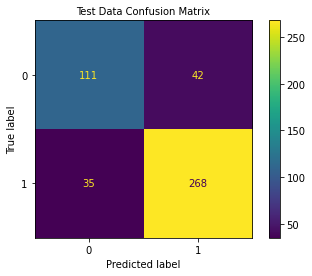

In [524]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');
plt.title('Test Data Confusion Matrix',fontsize=10);

In [525]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
lr_test_acc=lr.score(X_test, y_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


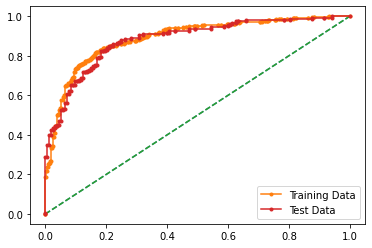

In [526]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lr_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lr_train_auc)

#  calculate roc curve
lr_train_fpr, lr_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lr_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lr_test_auc)

#  calculate roc curve
lr_test_fpr, lr_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section703></a>
### 7.3. KNN Model 

In [527]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.18201754385964908,
 0.17763157894736847,
 0.17105263157894735,
 0.17763157894736847,
 0.17324561403508776,
 0.16666666666666663,
 0.16666666666666663,
 0.17105263157894735,
 0.17105263157894735,
 0.16885964912280704,
 0.16228070175438591,
 0.17105263157894735,
 0.17324561403508776,
 0.17543859649122806,
 0.17763157894736847,
 0.17763157894736847,
 0.17324561403508776,
 0.17763157894736847,
 0.17763157894736847,
 0.17763157894736847,
 0.17982456140350878,
 0.17982456140350878]

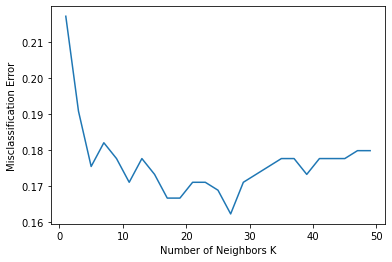

In [528]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,50,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [529]:
grid={'n_neighbors':[17,19,25,27,29],
      'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [530]:
NNH = KNeighborsClassifier()

In [531]:
grid_search = GridSearchCV(estimator = NNH, param_grid = grid, cv = 3)

In [532]:
# Call Nearest Neighbour algorithm

model=grid_search.fit(X_train, y_train)

In [533]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 29, 'weights': 'distance'} 

KNeighborsClassifier(n_neighbors=29, weights='distance')


In [534]:
best_model = grid_search.best_estimator_
knn=best_model
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.635117,0.364883
1,0.069860,0.930140
2,0.000000,1.000000
3,0.852998,0.147002
4,0.098154,0.901846


In [535]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = best_model.predict(X_test)

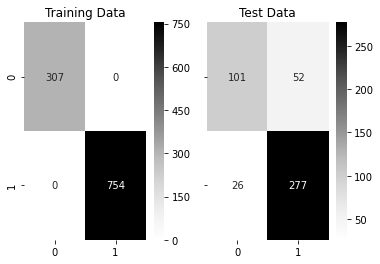

In [536]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [537]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.66      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456
 



In [538]:
knn_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
knn_test_acc=knn.score(X_test, y_test)

In [539]:
knn_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
knn_train_acc=knn.score(X_train, y_train)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.884


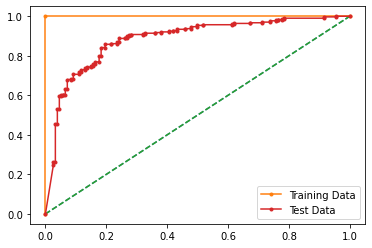

In [540]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % knn_train_auc)

#  calculate roc curve
knn_train_fpr, knn_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % knn_test_auc)

#  calculate roc curve
knn_test_fpr, knn_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section704></a>
### 7.4. Naïve Bayes 

In [541]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [542]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [543]:
nb=NB_model

In [544]:
nb.classes_

array([0, 1], dtype=int8)

In [545]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(nb, X_test, y_test)
print(imps.importances_mean)

[ 0.01008772  0.01052632  0.00263158  0.04166667  0.06403509  0.04254386
  0.02061404 -0.00482456]


In [546]:
NB_model.score(X_test, y_test)

0.8223684210526315

In [547]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = NB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = NB_model.predict(X_test)

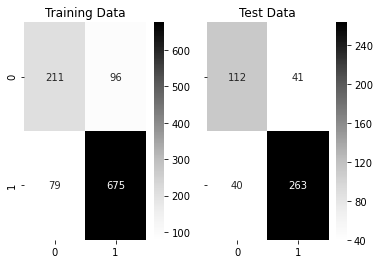

In [548]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [549]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



In [550]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [551]:
nb_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
nb_train_acc=NB_model.score(X_train, y_train)

In [552]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [553]:
nb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
nb_test_acc=NB_model.score(X_test, y_test)

AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


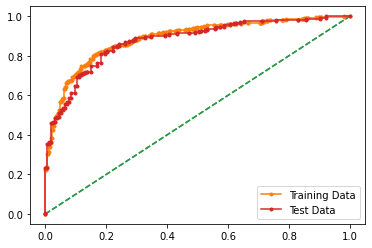

In [554]:
model=NB_model
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
nb_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % nb_train_auc)

#  calculate roc curve
nb_train_fpr, nb_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
nb_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % nb_test_auc)

#  calculate roc curve
nb_test_fpr, nb_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section705></a>
### 7.5. Support Vector Machine 

In [555]:
from sklearn import svm

In [556]:
clf = svm.SVC(probability=True,random_state=1)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [557]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(clf, X_test, y_test)
print(imps.importances_mean)

[0.01403509 0.01973684 0.00964912 0.03157895 0.08157895 0.06403509
 0.05175439 0.00394737]


In [558]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = clf.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clf.predict(X_test)

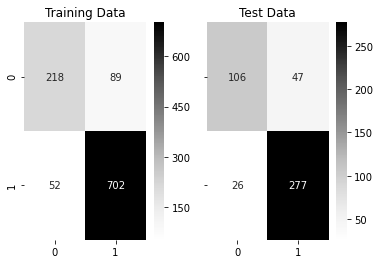

In [559]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [560]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.71      0.76       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.87      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



In [561]:
svm_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
svm_test_acc=clf.score(X_test, y_test)

In [562]:
svm_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
svm_train_precision=round(df.loc["1"][0],2)
svm_train_recall=round(df.loc["1"][1],2)
svm_train_f1=round(df.loc["1"][2],2)
svm_train_acc=clf.score(X_train, y_train)

AUC for the Training Data: 0.923
AUC for the Test Data: 0.888


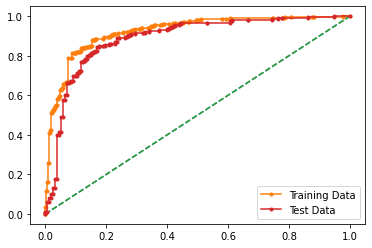

In [563]:
# Training Data Probability Prediction
pred_prob_train = clf.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = clf.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
svm_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % svm_train_auc)

#  calculate roc curve
svm_train_fpr, svm_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
svm_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % svm_test_auc)

#  calculate roc curve
svm_test_fpr, svm_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section706></a>
### 7.6. LDA (Linear Discriminant Analysis) 

In [564]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.001,0.0001,0.00001]}

In [565]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = clf, param_grid = grid, cv = 3)

In [566]:
model=grid_search.fit(X_train, y_train)

In [567]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [568]:
best_model = grid_search.best_estimator_
lda=best_model
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [569]:
lda.coef_

array([[-0.31451283,  0.53323845,  0.04660239,  0.8718636 , -1.14168126,
        -0.73746224, -0.46650872,  0.07438109]])

In [570]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = best_model.predict(X_test)

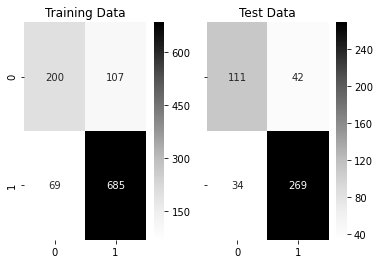

In [571]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [572]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [573]:
lda_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
lda_test_acc=lda.score(X_test, y_test)

In [574]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
lda_train_acc=lda.score(X_train, y_train)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


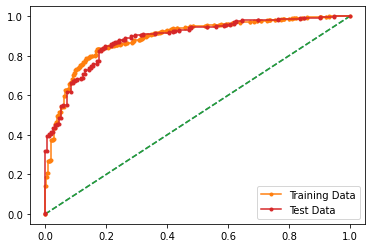

In [575]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section707></a>
### 7.7. Ensemble RandomForest Classifier 

In [576]:
from sklearn.ensemble import RandomForestClassifier
grid={'n_estimators':[100,200,500],
      'max_features':["auto", "sqrt", "log2"]}

RF_model=RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = RF_model, param_grid = grid, cv = 5)
model=grid_search.fit(X_train, y_train)

In [577]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_features': 'auto', 'n_estimators': 500} 

RandomForestClassifier(n_estimators=500, random_state=1)


In [578]:
RF_model = grid_search.best_estimator_

In [579]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = RF_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = RF_model.predict(X_test)

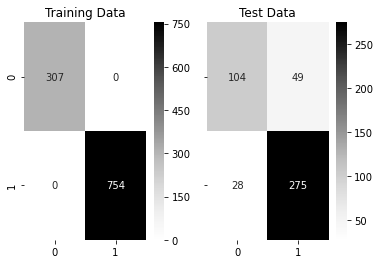

In [580]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [581]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



In [582]:
rfc_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(rfc_metrics).transpose()
rfc_test_precision=round(df.loc["1"][0],2)
rfc_test_recall=round(df.loc["1"][1],2)
rfc_test_f1=round(df.loc["1"][2],2)
rfc_test_acc=RF_model.score(X_test, y_test)

In [583]:
rfc_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(rfc_metrics).transpose()
rfc_train_precision=round(df.loc["1"][0],2)
rfc_train_recall=round(df.loc["1"][1],2)
rfc_train_f1=round(df.loc["1"][2],2)
rfc_train_acc=RF_model.score(X_train, y_train)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.895


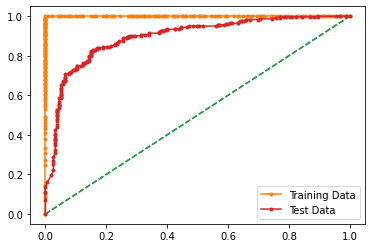

In [584]:
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
rfc_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % rfc_train_auc)

#  calculate roc curve
rfc_train_fpr, rfc_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfc_train_fpr, rfc_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rfc_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % rfc_test_auc)

#  calculate roc curve
rfc_test_fpr, rfc_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfc_test_fpr, rfc_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section707></a>
### 7.7. Ensemble Ada Boost Classifier

In [585]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=500,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500, random_state=1)

In [586]:
ADB_model.feature_importances_

array([0.844, 0.01 , 0.02 , 0.02 , 0.032, 0.064, 0.008, 0.002])

In [587]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ADB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ADB_model.predict(X_test)

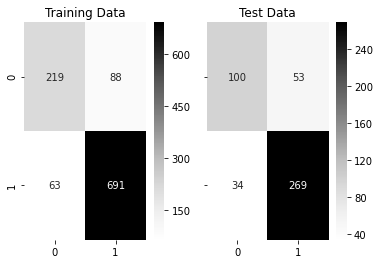

In [588]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [589]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456
 



In [590]:
adb_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
adb_test_acc=ADB_model.score(X_test, y_test)

In [591]:
adb_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
adb_train_acc=ADB_model.score(X_train, y_train)

AUC for the Training Data: 0.921
AUC for the Test Data: 0.872


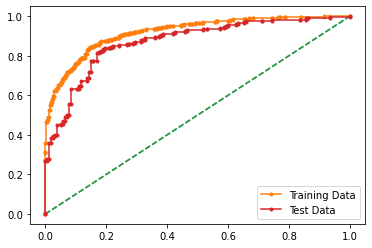

In [592]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
adb_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % adb_train_auc)

#  calculate roc curve
adb_train_fpr, adb_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
adb_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % adb_test_auc)

#  calculate roc curve
adb_test_fpr, adb_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section708></a>
### 7.8. Ensemble Gradient Boost Classifier

In [593]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [594]:
gbcl.feature_importances_

array([0.0972344 , 0.07661754, 0.03087567, 0.18705823, 0.34433321,
       0.17457236, 0.08682706, 0.00248154])

In [595]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = gbcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gbcl.predict(X_test)

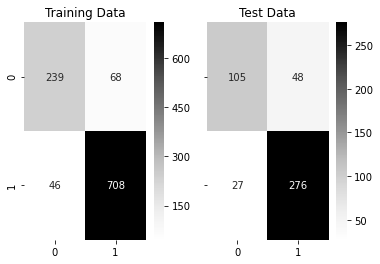

In [596]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [597]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



In [598]:
gdb_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(gdb_metrics).transpose()
gdb_test_precision=round(df.loc["1"][0],2)
gdb_test_recall=round(df.loc["1"][1],2)
gdb_test_f1=round(df.loc["1"][2],2)
gdb_test_acc=gbcl.score(X_test, y_test)

In [599]:
gdb_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(gdb_metrics).transpose()
gdb_train_precision=round(df.loc["1"][0],2)
gdb_train_recall=round(df.loc["1"][1],2)
gdb_train_f1=round(df.loc["1"][2],2)
gdb_train_acc=gbcl.score(X_train, y_train)

AUC for the Training Data: 0.951
AUC for the Test Data: 0.899


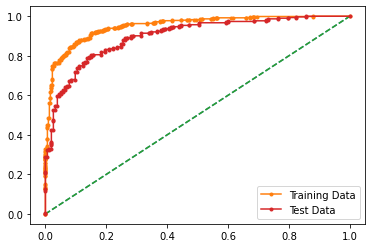

In [600]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
gdb_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gdb_train_auc)

#  calculate roc curve
gdb_train_fpr, gdb_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gdb_train_fpr, gdb_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gdb_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gdb_test_auc)

#  calculate roc curve
gdb_test_fpr, gdb_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gdb_test_fpr, gdb_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<a id=section8></a>
## 8. Conclusion : All Models Comparison

In [601]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logistic Regression Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'KNN Model Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Model Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
       'Naïve Bayes Model Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naïve Bayes Model Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'Support Vector Machine (SVM) Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'Support Vector Machine (SVM) Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'LDA Model Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Model Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'Random Forest Classifier Train':[rfc_train_acc,rfc_train_auc,rfc_train_recall,rfc_train_precision,rfc_train_f1],
        'Random Forest Classifier Test':[rfc_test_acc,rfc_test_auc,rfc_test_recall,rfc_test_precision,rfc_test_f1],
        'Ada Boost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Ada Boost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'Gradient Boost Train':[gdb_train_acc,gdb_train_auc,gdb_train_recall,gdb_train_precision,gdb_train_f1],
        'Gradient Boost Test':[gdb_test_acc,gdb_test_auc,gdb_test_recall,gdb_test_precision,gdb_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,KNN Model Train,KNN Model Test,Naïve Bayes Model Train,Naïve Bayes Model Test,Support Vector Machine (SVM) Train,Support Vector Machine (SVM) Test,LDA Model Train,LDA Model Test,Random Forest Classifier Train,Random Forest Classifier Test,Ada Boost Train,Ada Boost Test,Gradient Boost Train,Gradient Boost Test
Accuracy,0.83,0.83,1.0,0.83,0.84,0.82,0.87,0.84,0.83,0.83,1.0,0.83,0.86,0.81,0.89,0.84
AUC,0.89,0.88,1.0,0.88,0.89,0.88,0.92,0.89,0.89,0.89,1.0,0.89,0.92,0.87,0.95,0.90
Recall,0.91,0.88,1.0,0.91,1.00,0.87,0.93,0.91,0.91,0.89,1.0,0.91,0.92,0.89,0.94,0.91
Precision,0.86,0.86,1.0,0.84,1.00,0.87,0.89,0.85,0.86,0.86,1.0,0.85,0.89,0.84,0.91,0.85
F1 Score,0.88,0.87,1.0,0.88,1.00,0.87,0.91,0.88,0.89,0.88,1.0,0.88,0.90,0.86,0.93,0.88


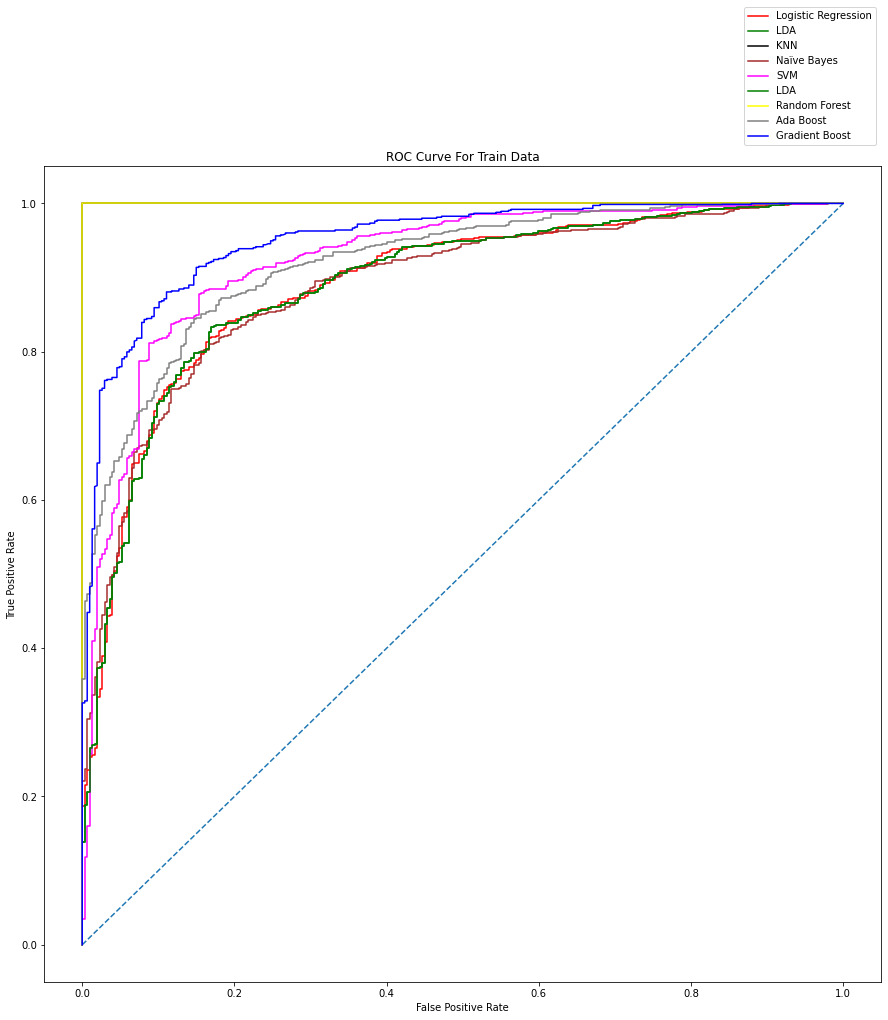

In [602]:
plt.figure(figsize=(15,15))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='black',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='brown',label="Naïve Bayes")
plt.plot(svm_train_fpr,svm_train_tpr,color='magenta',label="SVM")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(rfc_train_fpr,rfc_train_tpr,color='yellow',label="Random Forest")
plt.plot(adb_train_fpr,adb_train_tpr,color='grey',label="Ada Boost")
plt.plot(gdb_train_fpr,gdb_train_tpr,color='blue',label="Gradient Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

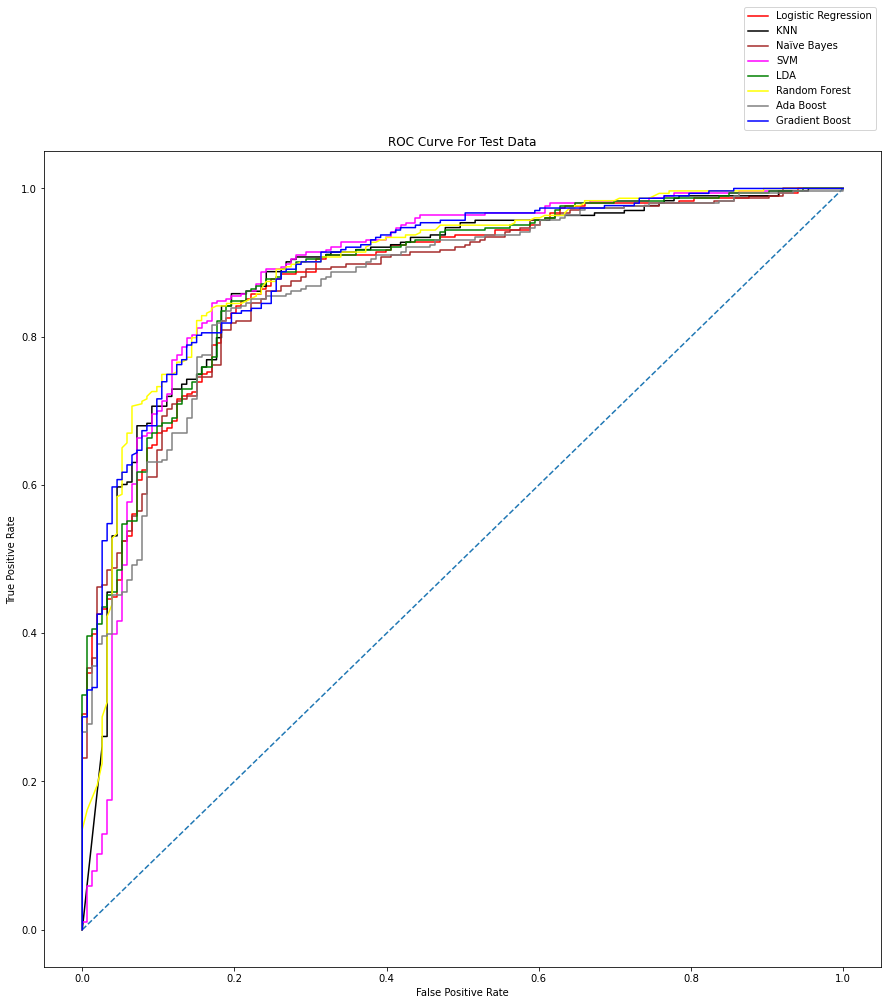

In [603]:
plt.figure(figsize=(15,15))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="Logistic Regression")
plt.plot(knn_test_fpr,knn_test_tpr,color='black',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='brown',label="Naïve Bayes")
plt.plot(svm_test_fpr,svm_test_tpr,color='magenta',label="SVM")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(rfc_test_fpr,rfc_test_tpr,color='yellow',label="Random Forest")
plt.plot(adb_test_fpr,adb_test_tpr,color='grey',label="Ada Boost")
plt.plot(gdb_test_fpr,gdb_test_tpr,color='blue',label="Gradient Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')